In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %env "WANDB_NOTEBOOK_NAME" "wandb_test"
# %env WANDB_SILENT=True

import os
from dotenv import load_dotenv

load_dotenv()

os.environ["WANDB_NOTEBOOK_NAME"] = "./wandb_test.ipynb"

WANDB_USER_NAME = os.environ.get("WANDB_USER_NAME", None)

if WANDB_USER_NAME is None:
    raise ValueError("WANDB_USER_NAME environment variable is not set.")

In [3]:
import wandb

wandb.login()

wandb: Currently logged in as: ilkersigirci. Use `wandb login --relogin` to force relogin


True

## Get data with api


### Playground


In [ ]:
import pandas as pd
import wandb

# project_name = "related-work"
# project_name = "6-protein-family-2-step"
project_name = "ataberk-chembl27-abl1"
# project_name = "ataberk-chembl27-renin"
# project_name = "ataberk-zinc15-zinc15-minor-targets"

api = wandb.Api()
runs = api.runs(WANDB_USER_NAME + "/" + project_name)

summary_list, config_list, name_list = [], [], []
for run in runs:
    summary_list.append(run.summary._json_dict)
    config_list.append({k: v for k, v in run.config.items() if not k.startswith("_")})
    name_list.append(run.name)

runs_df = pd.DataFrame(
    {"summary": summary_list, "config": config_list, "name": name_list}
)

runs_df

In [ ]:
for run in runs:
    print(f"Run name: {run.name}, len: {len(run.history())}")

In [42]:
sample_run = runs[1]

sample_history = sample_run.history(
    samples=1000, x_axis="n_clusters", keys=["n_clusters", "silhouette"]
)
# sample_run.scan_history()
sample_history

,n_clusters,silhouette
0,10,0.005764
1,20,0.008050
2,30,-0.004362
3,40,-0.000858
4,50,-0.000694
...,...,...
94,950,0.043029
95,960,0.043097
96,970,0.047281
97,980,0.047111


In [25]:
for temp in sample_run.scan_history(keys=["xxx", "n_clusters"]):
    print(temp)

In [29]:
pd.DataFrame(sample_run.scan_history(keys=["xxx", "n_clusters"]))

""


In [24]:
for temp in sample_run.scan_history(keys=["silhouette", "n_clusters"]):
    print(temp)

{'silhouette': 0.005763844586908817, 'n_clusters': 10}
{'silhouette': 0.008049944415688515, 'n_clusters': 20}
{'silhouette': -0.004361608996987343, 'n_clusters': 30}
{'silhouette': -0.0008582372684031725, 'n_clusters': 40}
{'silhouette': -0.0006943288026377559, 'n_clusters': 50}
{'silhouette': 0.00461325328797102, 'n_clusters': 60}
{'silhouette': 0.006196888629347086, 'n_clusters': 70}
{'silhouette': 0.007979604415595531, 'n_clusters': 80}
{'silhouette': 0.006264178082346916, 'n_clusters': 90}
{'silhouette': 0.009868458844721317, 'n_clusters': 100}
{'silhouette': -0.10038245469331741, 'n_clusters': 110}
{'silhouette': 0.010650471784174442, 'n_clusters': 120}
{'silhouette': 0.011038623750209808, 'n_clusters': 130}
{'silhouette': 0.010052095167338848, 'n_clusters': 140}
{'silhouette': -0.001592365326359868, 'n_clusters': 150}
{'silhouette': 0.015195746906101704, 'n_clusters': 160}
{'silhouette': 0.01219896413385868, 'n_clusters': 170}
{'silhouette': 0.015332912094891071, 'n_clusters': 18

In [28]:
# Directly to csv

# system_metrics = sample_run.history(stream="events")
# system_metrics.to_csv("sys_metrics.csv")

In [83]:
metric_name = "silhouette"
metric_x_index_name = "n_clusters"


# Is metric_name and metric_x_index_name both exist in sample_history
metric_name not in sample_history or metric_x_index_name not in sample_history

False

In [ ]:
reduced_sample_history = (
    sample_history[[metric_x_index_name, metric_name]].dropna().reset_index(drop=True)
)
reduced_sample_history[metric_x_index_name] = reduced_sample_history[
    metric_x_index_name
].astype(int)
reduced_sample_history["name"] = sample_run.name
reduced_sample_history

### Actual Code


In [5]:
from thesis_work.utils.wandb_api import (
    get_project_history,
    get_metric_from_project,
    plot_metric_from_project,
)

# project_name = "related-work"
# project_name = "6-protein-family-2-step"
project_name = "ataberk-chembl27-renin"

metric = "silhouette"
# metric = "calinski-harabasz-index"
# metric = "davies-bouldin"

metric_x_index_name = "n_clusters"

run_name_filter_substring = "_UMAP_16"

In [ ]:
project_history = get_project_history(
    project_name=project_name,
    filtered_columns=[metric, metric_x_index_name],
    run_name_filter_substring=run_name_filter_substring,
    sample_size=1000,
)
project_history

In [ ]:
result = get_metric_from_project(
    project_name=project_name,
    metric=metric,
    metric_x_index_name=metric_x_index_name,
    run_name_filter_substring=run_name_filter_substring,
    history_method="history",
)
result

#### Plotting


In [18]:
processed_result = result

# processed_result = result[result["name"].str.contains("UMAP_16")]
# processed_result.assign(base=processed_result['name'].apply(lambda x: 16 if '16' in x else 32))

In [ ]:
fig = plot_metric_from_project(
    df=processed_result,
    metric=metric,
    metric_x_index_name=metric_x_index_name,
    run_name_filter_substring=run_name_filter_substring,
    show_title=False,
    method="matplotlib",
    # save_path="./test.png",
)

fig

## Figures


In [89]:
from thesis_work.utils.wandb_api import (
    get_project_summary,
    get_metric_from_project,
    plot_metric_from_project,
)

# project_name = "related-work"
# project_name = "6-protein-family-2-step"
# project_name = "ataberk-chembl27-abl1"
# project_name = "ataberk-chembl27-renin"
project_name = "ataberk-chembl27-thb"

# metric = "silhouette"
metric = "adjusted-rand-index"
# metric = "calinski-harabasz-index"
# metric = "davies-bouldin"

metric_x_index_name = "n_clusters"
# metric_x_index_name= "threshold"

run_name_filter_substring = "_UMAP_16"
# run_name_filter_substring = "ecfp"
# run_name_filter_substring = "ChemBERTa"
# run_name_filter_substring = "chemprop"

# save_path = "Chembl_27_ABL1_Silhouette.png"
# save_path = "Chembl_27_ABL1_ARI.png"

# save_path = "Chembl_27_Renin_Silhouette.png"
# save_path = "Chembl_27_Renin_ARI.png"

# save_path = "Chembl_27_THB_Silhouette.png"
save_path = "Chembl_27_THB_ARI.png"

# save_path = "Related_Work_Silhouette.png"
# save_path = "Related_Work_Calinski_Harabasz.png"
# save_path = "Related_Work_Davies_Bouldin.png"

In [90]:
result = get_metric_from_project(
    project_name=project_name,
    metric=metric,
    metric_x_index_name=metric_x_index_name,
    run_name_filter_substring=run_name_filter_substring,
    history_method="history",
)
result.head()

,n_clusters,adjusted-rand-index,name
0,10,0.535,AGGLOMERATIVE_ECFP_UMAP_16
198,10,-0.001,AGGLOMERATIVE_CHEMBERTA-77M-MTR_UMAP_16
396,10,-0.000,K-MEANS_CHEMPROP_UMAP_16
297,10,-0.005,K-MEANS_ECFP_UMAP_16
99,10,0.004,AGGLOMERATIVE_CHEMPROP_UMAP_16


In [91]:
result.shape

(594, 3)

In [92]:
# result = result[result["name"].str.contains("K-MEANS_ECFP")]
# result = result[result["name"].str.contains("K-MEANS_CHEMBERTA")]
# result = result[result["name"].str.contains("K-MEANS_CHEMPROP")]

result = result[result["n_clusters"] < 250]

In [93]:
result["name"].value_counts()

AGGLOMERATIVE_ECFP_UMAP_16                 24
AGGLOMERATIVE_CHEMBERTA-77M-MTR_UMAP_16    24
K-MEANS_CHEMPROP_UMAP_16                   24
K-MEANS_ECFP_UMAP_16                       24
AGGLOMERATIVE_CHEMPROP_UMAP_16             24
K-MEANS_CHEMBERTA-77M-MTR_UMAP_16          24
Name: name, dtype: int64

In [94]:
result["name"] = result["name"].replace(
    {
        "K-MEANS_CHEMBERTA-77M-MTR_UMAP_16": "k-means ChemBERTa",
        "K-MEANS_CHEMPROP_UMAP_16": "k-means Chemprop",
        "K-MEANS_ECFP_UMAP_16": "k-means ECFP",
        "AGGLOMERATIVE_CHEMBERTA-77M-MTR_UMAP_16": "Agglomerative ChemBERTa",
        "AGGLOMERATIVE_CHEMPROP_UMAP_16": "Agglomerative Chemprop",
        "AGGLOMERATIVE_ECFP_UMAP_16": "Agglomerative ECFP",
    }
)

In [95]:
result

,n_clusters,adjusted-rand-index,name
0,10,0.535,Agglomerative ECFP
198,10,-0.001,Agglomerative ChemBERTa
396,10,-0.000,k-means Chemprop
297,10,-0.005,k-means ECFP
99,10,0.004,Agglomerative Chemprop
...,...,...,...
122,240,-0.003,Agglomerative Chemprop
518,240,0.000,k-means ChemBERTa
419,240,0.000,k-means Chemprop
221,240,-0.018,Agglomerative ChemBERTa


In [58]:
# ARI Fixes

# result[result["name"] == "k-means ECFP"]
# result.loc[result["adjusted-rand-index"] > 1, "adjusted-rand-index"]

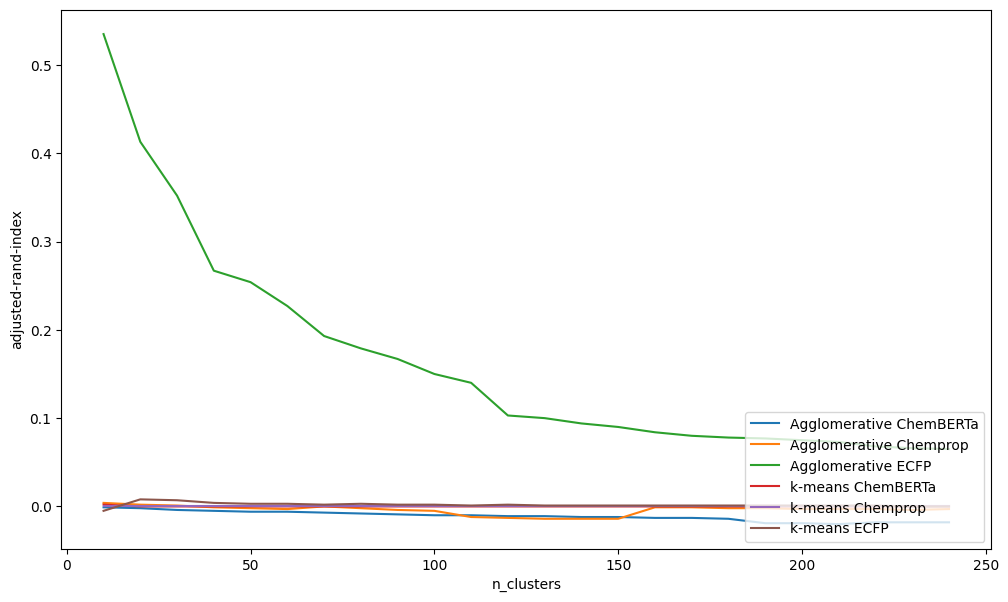

In [96]:
fig, ax = plot_metric_from_project(
    df=result,
    metric=metric,
    metric_x_index_name=metric_x_index_name,
    # run_name_filter_substring=run_name_filter_substring,
    show_title=False,
    method="matplotlib",
    save_path=save_path,
)

fig

In [26]:
size = os.path.getsize(save_path) / 1024
print(f"The size of the saved figure is {size:.2f} KB.")

The size of the saved figure is 131.80 KB.
